<a href="https://colab.research.google.com/github/Vilars/Data-205/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
t_df = pd.read_csv('https://raw.githubusercontent.com/Vilars/Data-205/refs/heads/main/Troubled.csv')

In [5]:
t_df['City'] = t_df['City'].str.title()

In [6]:
t_df.head(5)

,License Number,Community Name,Street Address,City,Zip Code,Case Number,Longitude,Latitude,First Inspection Date,Next Inspection Date,...,Compliant,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold,Analysis Rating,Location
0,62427,The Veridian At Silver Spring Metro,1133 East West Hwy,Silver Spring,20910,178097,-77.027783,38.989347,06/15/2023,NaN,...,1,457,110,0.54,0.72,68,0.00,0.0,compliant,"(38.9893, -77.0278)"
1,17369,"Schrider Street, 8115",8115 Schrider St,Silver Spring,20910,178075,-77.014091,38.991809,04/18/2023,NaN,...,1,9,11,3.72,1.67,2,0.27,0.0,troubled,"(38.9918, -77.0141)"
2,17200,Seneca Ridge,19568 Scenery Dr,Germantown,20876,177536,-77.234887,39.176872,04/13/2023,NaN,...,1,71,58,1.62,1.13,26,0.05,0.0,compliant,"(39.1769, -77.2349)"
3,17632,The Point At Germantown,2 Observation Ct,Germantown,20876,175575,-77.247494,39.192140,03/29/2023,NaN,...,1,218,63,0.85,1.11,28,0.03,0.0,compliant,"(39.1921, -77.2475)"
4,17286,"Kennebec Avenue, 903",903 KENNEBEC AVE,Takoma Park,20912,158817,-76.999427,38.990245,01/23/2020,NaN,...,0,1,0,0.00,0.00,0,0.00,0.0,TBD,"(38.9902, -76.9994)"


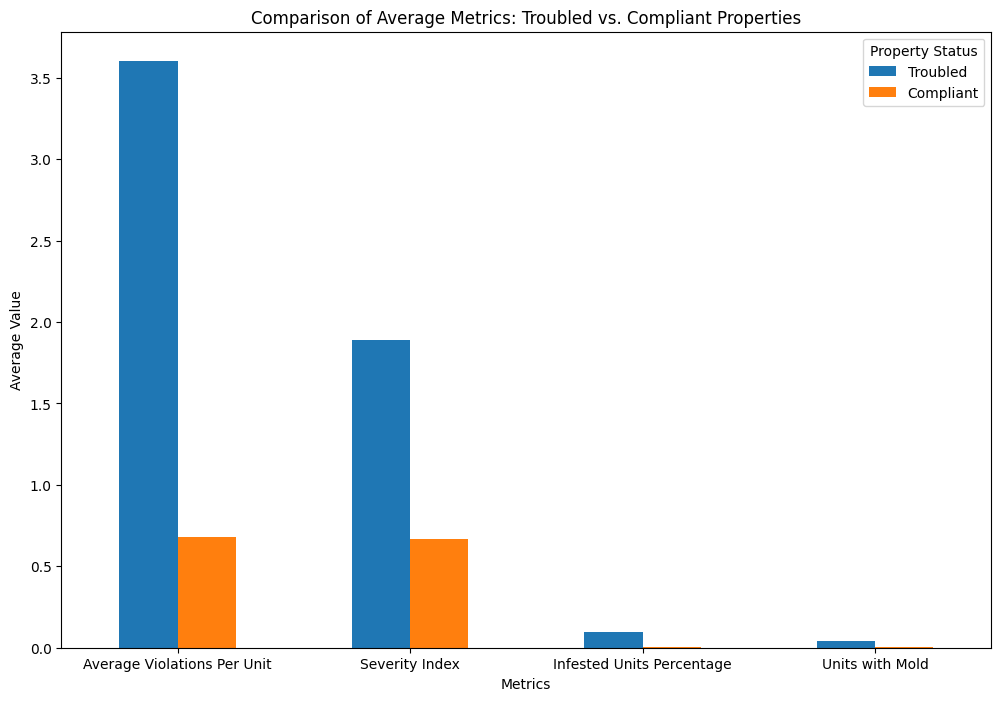

In [ ]:
# Average violation for troubled and compliant units

# Filter data for troubled and compliant properties
troubled_data = t_df[t_df['Analysis Rating'] == 'troubled'] # Changed 'ds' to 't_df'
compliant_data = t_df[t_df['Analysis Rating'] == 'compliant'] # Changed 'data' to 't_df'

# Calculate average metrics for troubled and compliant properties
metrics = ['Average Violations Per Unit', 'Severity Index', 'Infested Units Percentage', 'Units with Mold']
troubled_avg = troubled_data[metrics].mean()
compliant_avg = compliant_data[metrics].mean()

# Create a DataFrame for the average metrics
avg_metrics = pd.DataFrame({'Troubled': troubled_avg, 'Compliant': compliant_avg})

# Plot the bar chart
avg_metrics.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Average Metrics: Troubled vs. Compliant Properties')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Property Status')
plt.show()

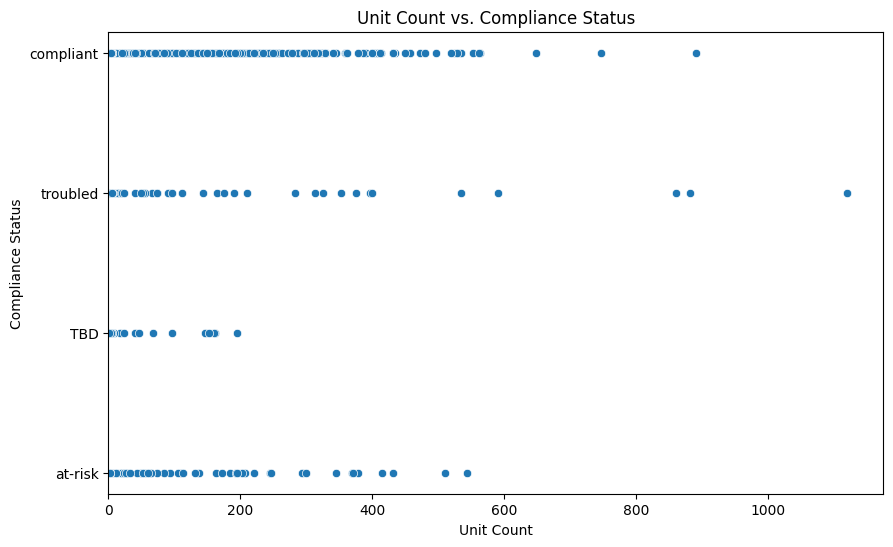

In [ ]:
# Scatter plot unit count and compliance status

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit Count', y='Analysis Rating', data = t_df)
plt.title('Unit Count vs. Compliance Status')
plt.xlabel('Unit Count')
plt.ylabel('Compliance Status')
plt.xlim(0)
plt.show()


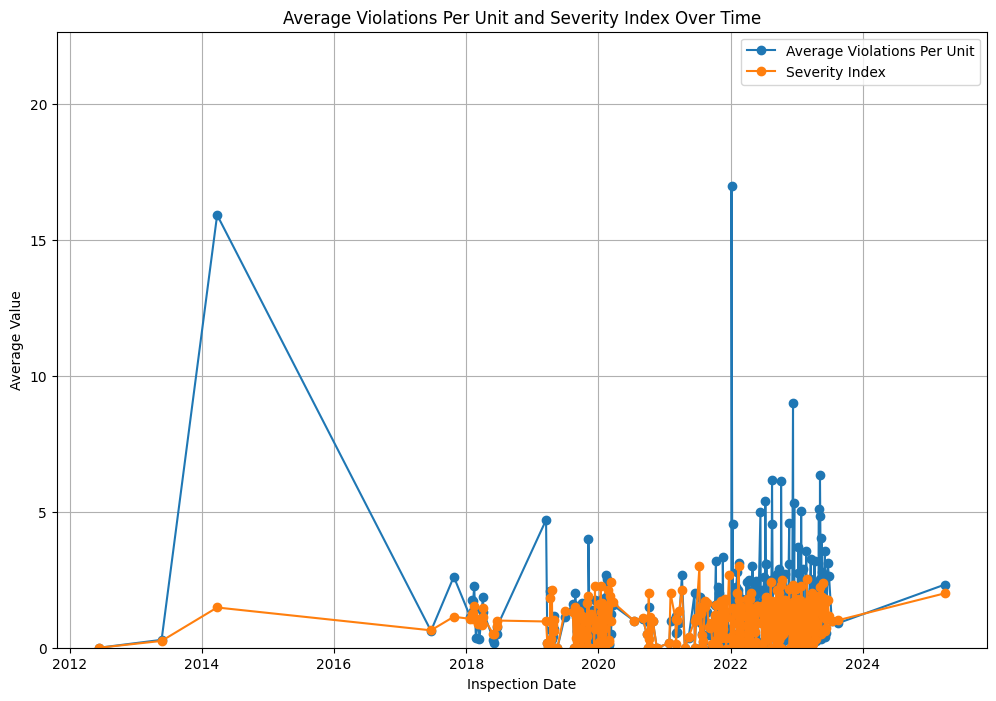

In [ ]:
# Change in average violation per unit

# Convert inspection dates to datetime format
t_df['First Inspection Date'] = pd.to_datetime(t_df['First Inspection Date'], format='%m/%d/%Y')

# Group by inspection date and calculate average violations per unit and severity index
grouped_data = t_df.groupby('First Inspection Date').agg({
    'Average Violations Per Unit': 'mean',
    'Severity Index': 'mean'
}).reset_index()

# Line Chart: Track changes in average violations per unit and severity index over time
plt.figure(figsize=(12, 8))
plt.plot(grouped_data['First Inspection Date'], grouped_data['Average Violations Per Unit'], label='Average Violations Per Unit', marker='o')
plt.plot(grouped_data['First Inspection Date'], grouped_data['Severity Index'], label='Severity Index', marker='o')
plt.title('Average Violations Per Unit and Severity Index Over Time')
plt.xlabel('Inspection Date')
plt.ylabel('Average Value')
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.show()

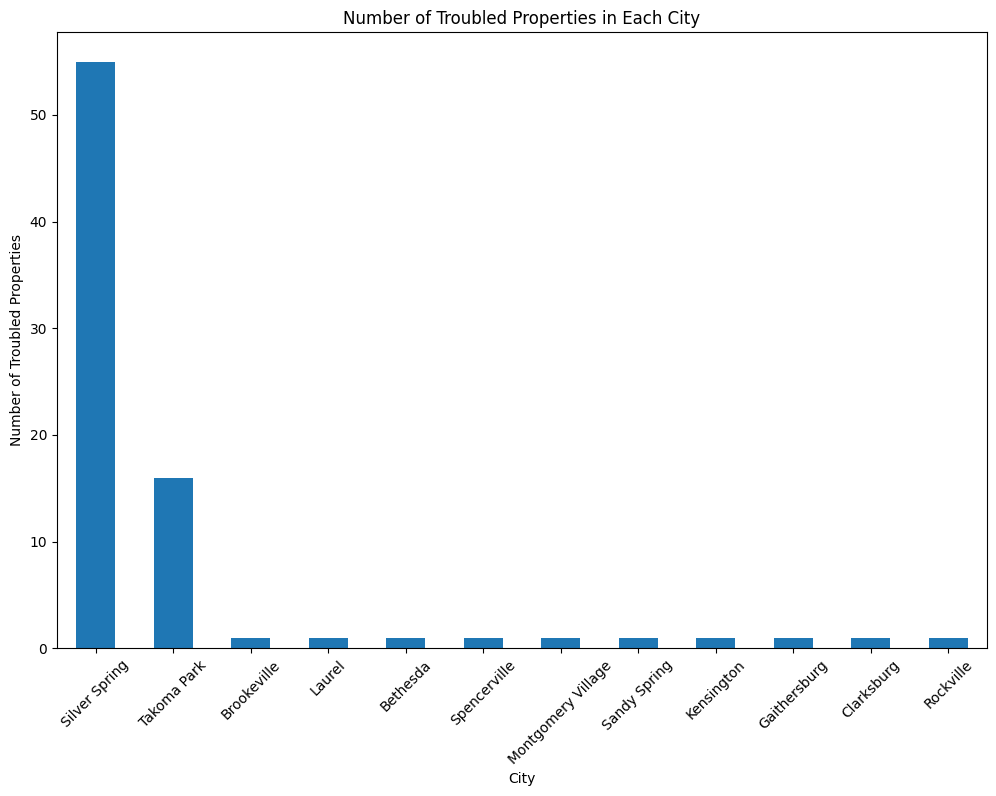

In [7]:
# violations per city
# Filter data for troubled properties
troubled_data = t_df[t_df['Analysis Rating'] == 'troubled']

# Count the number of troubled properties in each city
city_counts = troubled_data['City'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar')
plt.title('Number of Troubled Properties in Each City')
plt.xlabel('City')
plt.ylabel('Number of Troubled Properties')
plt.xticks(rotation=45)
plt.show()

In [8]:
import folium

# Filter data for troubled properties
troubled_data = t_df[t_df['Analysis Rating'] == 'troubled']
# Create a map centered around the average latitude and longitude of the troubled properties
map_center = [troubled_data['Latitude'].mean(), troubled_data['Longitude'].mean()]
troubled_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each troubled property
for idx, row in troubled_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Community Name']}, {'Street Address'}, {row['City']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(troubled_map)

# Save the map to an HTML file
troubled_map.save('troubled_properties_map.html')

print('troubled_properties_map.html')
display(troubled_map)

troubled_properties_map.html
